# Preprocess FSD50K Dataset

In [3]:
import json
import pickle

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

## Read dataset files

In [16]:
# Load the metacollection file

df_metacoll = pd.read_csv(
    r"D:\datasets\FSD50K\FSD50K.metadata\collection\collection_dev.csv"
)
df_metacoll.mids = df_metacoll.mids.str.split(",")

df_metacoll.head()

,fname,labels,mids
0,64760,Electric_guitar,[/m/02sgy]
1,16399,Electric_guitar,[/m/02sgy]
2,16401,Electric_guitar,[/m/02sgy]
3,16402,Electric_guitar,[/m/02sgy]
4,16404,Electric_guitar,[/m/02sgy]


In [3]:
# Load the ontology file

ontology_filepath = (
    r"C:\Users\memis\Documents\mct\thesis\code\analyze_datasets\ontology.json"
)
with open(ontology_filepath) as f:
    mids = json.load(f)
dict_mids = {d["id"]: d for d in mids}

len(dict_mids.keys())

632

## Create a directed graph

In [4]:
# Find the first level of the ontology

first_level = set(dict_mids.keys())
for ki in dict_mids.keys():
    for kj, vd in dict_mids.items():
        if ki in vd["child_ids"]:
            first_level.remove(ki)
            break

first_level

{'/m/04rlf',
 '/m/059j3w',
 '/m/0dgw9r',
 '/m/0jbk',
 '/t/dd00041',
 '/t/dd00098',
 '/t/dd00123'}

In [5]:
# Create a directed graph from the ontology

G = nx.DiGraph()
for mid, data in dict_mids.items():
    G.add_node(mid, label=data["name"])
    for child in data["child_ids"]:
        G.add_edge(mid, child)

len(dict_mids), len(set(G.nodes())), len(G.nodes())

(632, 632, 632)

In [6]:
# Create graph layout for visualization

layers = {}
layers[0] = list(first_level)
level = list(first_level)
level_id = 0
visited = []
visited.extend(first_level)

while True:
    level_id += 1
    next_level = []
    for mid in level:
        for child in dict_mids[mid]["child_ids"]:
            if child not in visited:
                next_level.append(child)
                visited.append(child)
    if len(next_level) == 0:
        break
    layers[level_id] = next_level
    level = next_level

layers.keys()

dict_keys([0, 1, 2, 3, 4, 5])

## Visualize

### Interactive vs Non-Interactive Visualization

In [7]:
# Interactive
%matplotlib qt

In [8]:
# Non-interactive
%matplotlib inline

### Draw

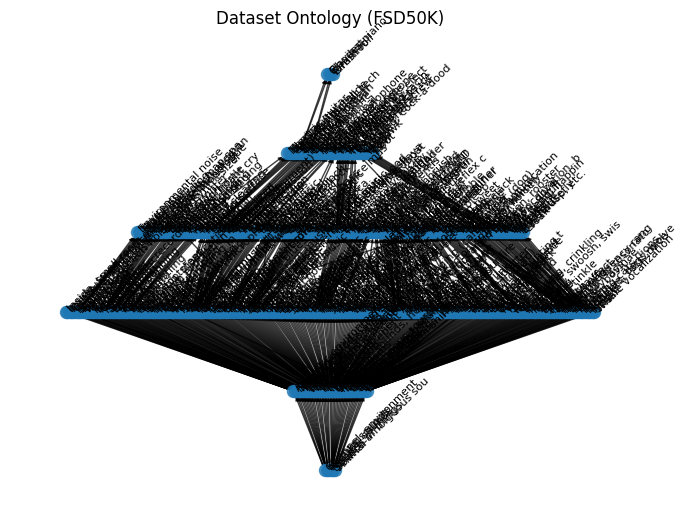

In [9]:
# Draw the graph with hierarchical layout

plt.clf()
pos = nx.multipartite_layout(G, subset_key=layers, align="horizontal")
nx.draw(
    G,
    pos,
    # labels=nx.get_node_attributes(G, "label"),
    # with_labels=True,
    node_size=75,
    font_size=10,
    font_weight="bold",
    arrowsize=5,
    width=1,
    alpha=0.75,
)

# Add labels
for node in G.nodes():
    x, y = pos[node]
    label = G.nodes[node]["label"]
    plt.text(
        x,
        y,
        label[:20],
        fontsize=8,
        rotation=45,
        ha="left",
    )

plt.title("Dataset Ontology (FSD50K)")
plt.show()

### Save graph

In [10]:
# Save the graph to a file

timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
with open(f"{timestamp}_dataset_ontology.gpickle", "wb") as f:
    pickle.dump(G, f, pickle.HIGHEST_PROTOCOL)